# Four Charges
## PH 212 COCC
### Bruce Emerson 6/14/2020

It is a basic tenant of physics teaching that one of the things which is often hard to learn is to reason quantitatively without numbers. This is often relevant when we know the relationship between the outcome and the characteristics of the problem that affect that outcome. In the case of charge we (hopefully) understand conceptually that changing the magnitude of either charge changes the amount of force they each experience and that the distance between the charges (or the centers of spherical distributions of charge) also affects the force. The force depends on the inverse of the square of the distance.

This notebook is an attempt to provide some direct practice with those concepts.

## Dependencies

This is my usual spectrum of dependencies that seem to be generally useful. We'll see if I need additional ones. The notebooks with OO at the end of the name use the older version of the numpy.random random number generators. The newer generator ```default_rng``` will be commented out in the dependencies where appropriate.

In [1]:
import numpy as np
from decimal import Decimal
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply
from numpy.random import default_rng
rng = default_rng()

## Side note: Coin Flips in numpy

To generate some of the parameters (+/-) or (milli/micro) I wanted a coin flip. Foolishly I imagined if I randomly generated an integer from [0,2] NOT including the 2 I would get something like a coin flip. (rng.integer is the generator). This did not look right and eventually I discoverd that I needed to use a binomial generator with a probability of 0.5. My code looks like this now (for future reference) and it feels like its working right.
```
diagonal = rng.binomial(1,0.5)
```
Two references that were helpful:  
[General Generator Structure](https://numpy.org/devdocs/reference/random/index.html?highlight=random%20quick%20start)  
[Binomial Arguments](https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.binomial.html?highlight=binomial#numpy.random.Generator.binomial)


## The Problem

Four charges of some magnitude are arranged in a square. One pair of opposite corners are positively charged and the other corners are negatively charged. What is the magnitude and direction of the force on one of the corner charges? Since you have had time to practice with the notebook the values on the test will be new to you.

To get the most out of this exercise the next cell is minimized and should be left so. Run the cell to generate a new version of the problem that will be plotted below.

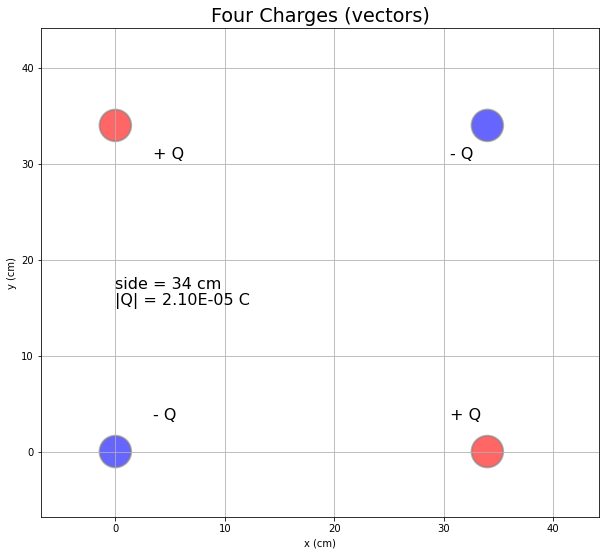

In [2]:
# Generate the problem
# set up and definitions

kconstant = 8.99E+9

# First generate the charge (same at all 4 corners)
chargesize = rng.integers(1,100) # generate an integer 
exponent = rng.integers(3,10) # generate an exponent
charge = np.float(chargesize)*10.**(-exponent)
#print("Charge is: %.2E" % charge)

# Generate side of square in cm
side = rng.integers(1,100) # generate an integer between 1 and 100 in cm

# which diagonal has + charges, flip coin
diagonal = rng.binomial(1,0.5) # diagonal 0 is up to right, charges 1 and 3

# generate charge locations
xq1 = 0.
yq1 = 0.
xq2 = 0.
yq2 = side
xq3 = side
yq3 = side
xq4 = side
yq4 = 0.

size = 1000.

if diagonal == 0:
    xpositive = [xq1,xq3]
    ypositive = [yq1,yq3]
    xnegative = [xq2,xq4]
    ynegative = [yq2,yq4]
else:
    xpositive = [xq2,xq4]
    ypositive = [yq2,yq4]
    xnegative = [xq1,xq3]
    ynegative = [yq1,yq3]

zsquare = [size,size] # sets size of plotted charge

# stuff
result = kconstant*charge*charge*.9142/((np.float(side)/100)**2)
#print("check result %.2E N" % result)

# Let the plotting begin!!
fig2, ax2 = plt.subplots()

# plot + and - charges with different colors
ax2.scatter(xpositive, ypositive, s=zsquare, color = 'red',
            alpha=0.6, edgecolors="grey", linewidth=2)
ax2.scatter(xnegative, ynegative, s=zsquare, color = 'blue',
            alpha=0.6, edgecolors="grey", linewidth=2)

# define plot limits
xlimH = 1.3*side
xlimL = -.2*side
ylimH = 1.3*side
ylimL = -.2*side
plt.ylim(xlimL, xlimH)
plt.xlim(xlimL, xlimH)

# Add titles (main and on axis)
plt.rcParams.update({'font.size': 16}) # make labels easier to read
ax2.set(xlabel='x (cm)', ylabel='y (cm)',
       title='Four Charges (vectors)')
# label the charges
offset = 0.1*side
if diagonal == 0:
    label1 = ("+ Q")
    label2 = ("- Q")
    label3 = ("+ Q")
    label4 = ("- Q")
else:
    label1 = ("- Q")
    label2 = ("+ Q")
    label3 = ("- Q")
    label4 = ("+ Q")

labelref1 = ("side = %i cm" % side)
labelref2 = ("|Q| = %.2E C" % (charge))
    
    
ax2.text(xq1+offset, yq1+offset, label1)
ax2.text(xq2+offset, yq2-offset, label2)
ax2.text(xq3-offset, yq3-offset, label3)
ax2.text(xq4-offset, yq4+offset, label4)
ax2.text(xq1, yq2/2, labelref1)
ax2.text(xq1, yq2/2-offset/2, labelref2)

# define display parameters
fig2.set_size_inches(10, 9)
# ax2.legend(loc= 2)
ax2.grid()
plt.show()

#fig2.savefig('fourcharges.png')


## Your Answer!

Execute the cell below to check your answer. If you don't get it right you can rerun this cell and try again. The problem will remain static until you rerun the cell above this.

To get the most out of this exercise minimize the next cell (click on the bar to the left) and the run the cell to generate a problem that will be plotted below.

In [4]:
# get student result
print("Enter the magnitude of the force in N")
print("Enter in the form 34.5E+03 or 5.6E-04")
studentresult = float(input("Enter your result: "))

# check result relative to answer
closeness = np.absolute(1.0 - (studentresult/result))
if closeness < 0.01:
    print("Yay, you nailed it!")
else:
    if closeness < 0.05:
        print("You are within 5% which could just be rounding errors. ")
    else:
        if closeness < 0.2:
            print("You are within 20% which feels like you're doing it right. Check numbers. ")
        else:
            print("Probably need to run the numbers again or generate a new problem. ")
    
print("Practice makes perfect")


Enter the magnitude of the force in N
Enter in the form 34.5E+03 or 5.6E-04


Enter your result:  32.5


You are within 5% which could just be rounding errors. 
Practice makes perfect


## Practice!!

Rinse and repeat until you get it right a couple of times in a row.